In [1]:
from utils.agent import *
from utils.dataset import read_voc_dataset
from IPython.display import clear_output
import matplotlib.pyplot as plt
import tqdm.notebook as tq
import numpy as np
%reload_ext autoreload
%autoreload 2

## 1. Load dataset and visualize

In [2]:
train_loader2007, val_loader2007 = read_voc_dataset(path="." ,year='2007')
train_loader2012, val_loader2012 = read_voc_dataset(path="." ,year='2012')

In [5]:
datasets_per_class = sort_class_extract([train_loader2007, train_loader2012])

  0%|          | 0/2501 [00:00<?, ?it/s]

  0%|          | 0/5717 [00:00<?, ?it/s]

In [6]:
cat_dataset = datasets_per_class['cat']
len(cat_dataset)

706

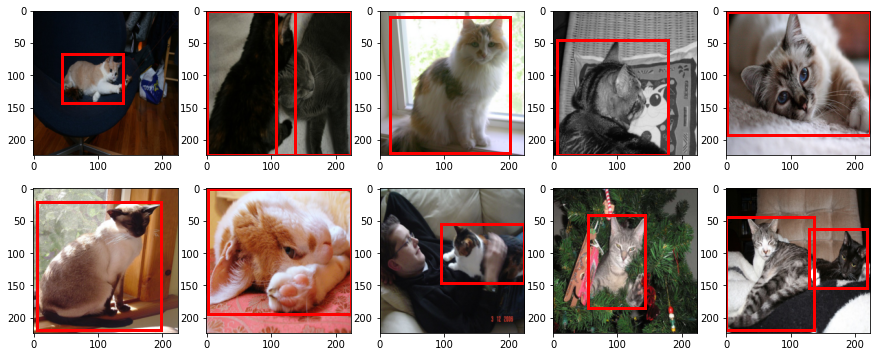

In [7]:
t = 1
plt.figure(figsize=[15,6])
indexes = []
for i in list(cat_dataset.keys())[:10]:
    indexes.append(i)
    image = cat_dataset[i][0][0]
    plt.subplot(2,5,t)
    plt.imshow(image.permute([1,2,0]))
    
    for j in range(1,len(cat_dataset[i][0])):
        gt = cat_dataset[i][0][j][0]
        image_size = cat_dataset[i][0][j][1]
    
        origin_width, origin_height = int(image_size['width']), int(image_size['height'])
        real_width, real_height = 224, 224
        width_ratio, height_ratio = real_width/origin_width, real_height/origin_height

        bdbox = np.array([gt['xmin'], gt['ymin'], gt['xmax'], gt['ymax']]).astype('float')
        bdbox = (bdbox * [width_ratio, height_ratio, width_ratio, height_ratio]).astype('int')

    
        plt.gca().add_patch(plt.Rectangle((bdbox[0], bdbox[1]), 
                                          bdbox[2]-bdbox[0], bdbox[3]-bdbox[1], 
                                          fill=False, edgecolor='r', linewidth=3))
    t += 1

## 2. Training

In [60]:
for i in tq.tqdm(range(len(classes))):
    classe = classes[i]
    print("Classe "+str(classe)+"...")
    agent = Agent(classe, alpha=0.2, num_episodes=15, load=False, model_name='vgg16')
    agent.train(datasets_per_class[classe])
    del agent
    torch.cuda.empty_cache()

  0%|          | 0/1 [00:00<?, ?it/s]

Classe cat...
Episode 0
Saved
Complete
Episode 1
Saved
Complete
Episode 2
Saved
Complete
Episode 3
Saved
Complete
Episode 4
Saved
Complete
Episode 5
Saved
Complete
Episode 6
Saved
Complete
Episode 7
Saved
Complete
Episode 8
Saved
Complete
Episode 9
Saved
Complete
Episode 10
Saved
Complete
Episode 11
Saved
Complete
Episode 12
Saved
Complete
Episode 13
Saved
Complete
Episode 14
Saved
Complete


## 3. Test

In [10]:
from utils.tools import classes
model_name='vgg16'
classe = random.choice(classes)
agent = Agent(classe, load=True, model_name=model_name)

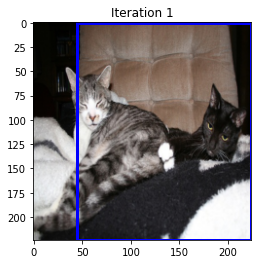

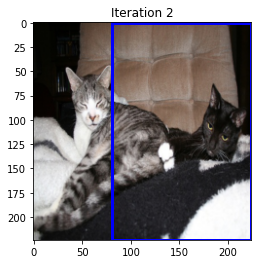

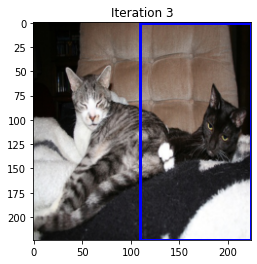

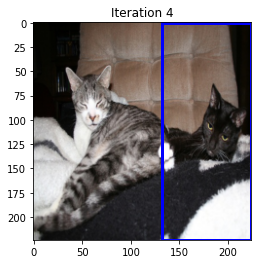

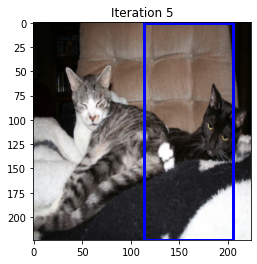

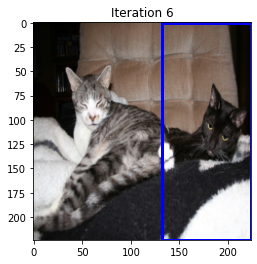

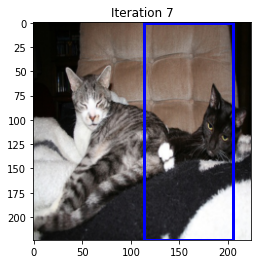

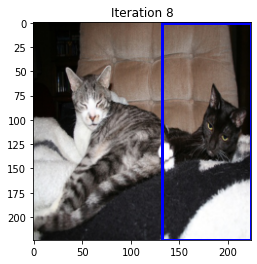

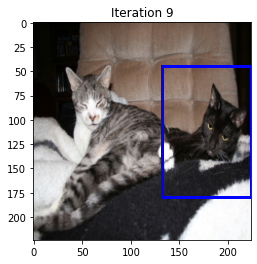

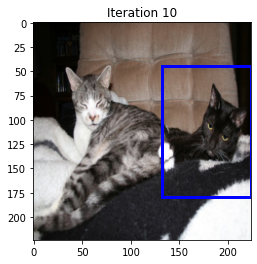

In [11]:
i = 9
for index in indexes[i:i+1]:
    image, gt_boxes = extract(index, datasets_per_class[classe])
    agent.predict_image(image, plot=True)

In [9]:
datasets_per_class_val = sort_class_extract([val_loader2007])

  0%|          | 0/2510 [00:00<?, ?it/s]

In [12]:
torch.cuda.empty_cache()
results = {}
for i in classes:
    results[i] = []
model_name='vgg16'
for i in tq.tqdm(range(len(classes))):
    classe = classes[i]
    print("Class "+str(classe)+"...")
    agent = Agent(classe, load=True, model_name=model_name)
    res = agent.evaluate(datasets_per_class[classe])
    results[classe] = res

  0%|          | 0/1 [00:00<?, ?it/s]

Class cat...
Predicting boxes...
Computing recall and ap...
Final result : 
              0.4        0.5        0.6
ap      94.490238  92.643204  80.228975
recall  96.883853  95.892351  88.810198
